In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#This line says display matplotlib pictures in inline#
%matplotlib inline 

# Load data into jupyter

In [2]:
df=pd.read_excel('pima-data.xlsx')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True


In [3]:
len(df)

768

# cleaning process

### let us find if there are any null values

In [4]:
df.isnull().values.any()

np.False_

### find correlated col or duplicate columns

In [5]:
#first check how many col---->12

In [6]:
def plot_corr(df,size=12):
    corr=df.corr() #pandas data frame correlation function
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)#color code the rectangles by correlation values
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

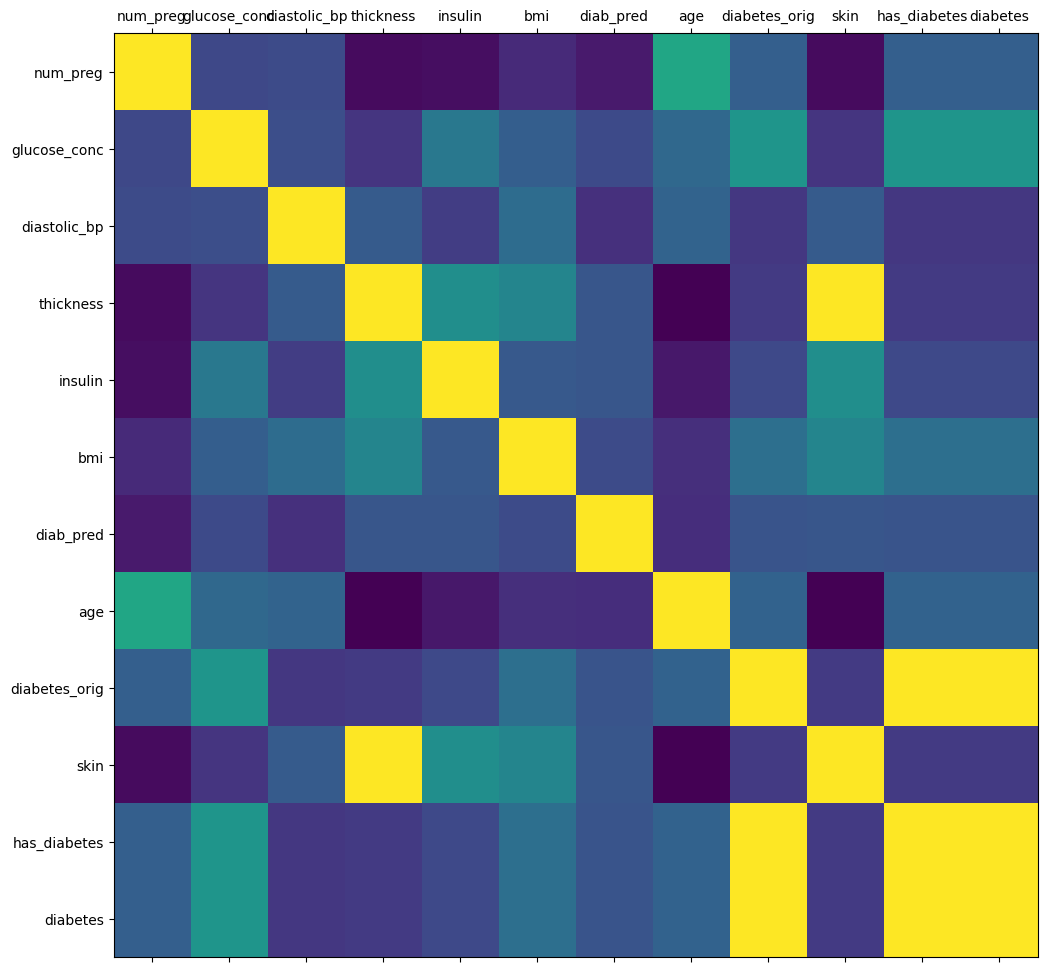

In [7]:
#lets call above function
plot_corr(df)

### remove thickness ,diabtetes_org and has_diabetes

In [9]:
del df['thickness']
del df['has_diabetes']
del df['diabetes_orig']

In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


### convert true and false to 1 and 0 because ML algo will not understand text

In [11]:
diabetes_map={True:1,False:0} #dict mapping
df['diabetes']=df['diabetes'].map(diabetes_map)

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


# Training the data 1)First we need to split data

### check how may diabetic and non diabetic patients in the dataset

In [13]:
num_true=len(df.loc[df['diabetes']==True]) 
num_false=len(df.loc[df['diabetes']==False]) 
print('true(diabetic patient)=',(num_true/(num_true+num_false))*100)
print('False(Non diabetic patient)=',(num_false/(num_true+num_false))*100)

true(diabetic patient)= 34.89583333333333
False(Non diabetic patient)= 65.10416666666666


### lets split our data for training and testing the algorithm

In [15]:
from sklearn.model_selection import train_test_split
feature_col_names=['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred'
                   ,'age','skin']
predicted_class_name=['diabetes']
x=df[feature_col_names].values
y=df[predicted_class_name].values
split_test_size=0.30 #test data percentage 
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=split_test_size,random_state=42) #for horizontal cut

In [16]:
#make sure training data and testing data is 70% and 30%
print('{0:0.2f}% in training set',format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% in testing set',format((len(x_test)/len(df.index))*100))

{0:0.2f}% in training set 69.921875
{0:0.2f}% in testing set 30.078125


In [17]:
#original data has 35% diabetic true and 65% diabetic false... same should be persistent after split
print('Training true:{0}({1:0.2}%)'.format(len(y_train[y_train[:] == 1]), (
      len(y_train[y_train[:]==1])/len(y_train)*100)))
print('Training false:{0}({1:0.2}%)'.format(len(y_train[y_train[:] == 0]),(
      len(y_train[y_train[:]==0])/len(y_train)*100)))

print('test true:{0}({1:0.2}%)'.format(len(y_test[y_test[:]==1]),(
      len(y_test[y_test[:]==1])/len(y_test)*100)))
print('test false:{0}({1:0.2}%)'.format(len(y_test[y_test[:]==0]),(
      len(y_test[y_test[:]==0])/len(y_test)*100)))
#hence its persisting

Training true:188(3.5e+01%)
Training false:349(6.5e+01%)
test true:80(3.5e+01%)
test false:151(6.5e+01%)


### analyze invalid data like which col contain 0 eg insulin and bp cannot be zero and rectfying with mean or mode

In [18]:
print('# rows in dataframe:{0}'.format(len(df)))
print('# rows missing glucose_conc:{0}'.format(len(df.loc[df['glucose_conc']==0])))
print('# rows missing diastolic_bp:{0}'.format(len(df.loc[df['diastolic_bp']==0])))
print('# rows missing thickness:{0}'.format(len(df.loc[df['skin']==0])))
print('# rows missing insulin:{0}'.format(len(df.loc[df['insulin']==0])))
print('# rows missing bmi:{0}'.format(len(df.loc[df['bmi']==0])))
print('# rows missing diab_pred:{0}'.format(len(df.loc[df['diab_pred']==0])))
print('# rows missing age:{0}'.format(len(df.loc[df['age']==0])))

# rows in dataframe:768
# rows missing glucose_conc:5
# rows missing diastolic_bp:35
# rows missing thickness:227
# rows missing insulin:374
# rows missing bmi:11
# rows missing diab_pred:0
# rows missing age:0


### inserting mean values in 0 value row

In [20]:
from sklearn.impute import SimpleImputer
fill_0=SimpleImputer(missing_values=0,strategy='mean')
x_train=fill_0.fit_transform(x_train)
x_test=fill_0.fit_transform(x_test)

In [21]:
x_train[0:10]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.65480000e+00],
       [4.00000000e+00, 1.31000000e+02, 6.80000000e+01, 1.66000000e+02,
        3.31000000e+01, 1.60000000e-01, 2.80000000e+01, 8.27400000e-01],
       [1.00000000e+00, 1.03000000e+02, 3.00000000e+01, 8.30000000e+01,
        4.33000000e+01, 1.83000000e-01, 3.30000000e+01, 1.49720000e+00],
       [2.00000000e+00, 8.20000000e+01, 5.20000000e+01, 1.15000000e+02,
        2.85000000e+01, 1.69900000e+00, 2.50000000e+01, 8.66800000e-01],
       [3.00000000e+00, 1.28000000e+02, 7.80000000e+01, 1.55333333e+02,
        2.11000000e+01, 2.68000000e-01, 5.50000000e+01, 1.

### training initial algo-Naive Bays

In [22]:
from sklearn.naive_bayes import GaussianNB
#create gaussian naive bayues model object and train it with data
nb_model=GaussianNB()
nb_model.fit(x_train,y_train.ravel()) #ravel is fun which generates 2D array

,priors,None
,var_smoothing,1e-09


# lets test algo accuracy with training data itself

In [23]:
nb_predict_train=nb_model.predict(x_train)
from sklearn import metrics
print('accuracy:{0:4f}'.format(metrics.accuracy_score(y_train,nb_predict_train)))

accuracy:0.754190


# testing model with test data

In [24]:
nb_predict_test=nb_model.predict(x_test)
from sklearn import metrics
print('accuracy:{0:4f}'.format(metrics.accuracy_score(y_test,nb_predict_test)))

accuracy:0.735931


# Algorithm performance

In [26]:
print('Confusion matrix:')
print('{0}'.format(metrics.confusion_matrix(y_test,nb_predict_test)))
print('')
print('classification report')
print(metrics.classification_report(y_test, nb_predict_test))

Confusion matrix:
[[118  33]
 [ 28  52]]

classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### final observation of naive bayes algo ===> accuracy 73% ,recall 81%(recall internally says type 1error)
### type2 error values should be less compared to type 1 error

# Random forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train.ravel())
rf_predict_test=rf_model.predict(x_test)
#training metrics
print('accuracy:{0:4f}'.format(metrics.accuracy_score(y_test,rf_predict_test)))


accuracy:0.753247


In [32]:
print('Confusion matrix:')
print('{0}'.format(metrics.confusion_matrix(y_test,rf_predict_test)))
print('')
print('classification report')
print(metrics.classification_report(y_test, rf_predict_test))

Confusion matrix:
[[120  31]
 [ 26  54]]

classification report
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



# Logistic regression algo

In [43]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(class_weight='balanced',C=0.2 ,random_state=42) # c is hyperparameter
lr_model.fit(x_train,y_train.ravel())
lr_predict_test=lr_model.predict(x_test)
print('accuracy:{0:4f}'.format(metrics.accuracy_score(y_test,lr_predict_test)))

print('Confusion matrix:')
print('{0}'.format(metrics.confusion_matrix(y_test,lr_predict_test)))
print('')
print('classification report')
print(metrics.classification_report(y_test, lr_predict_test))

accuracy:0.714286
Confusion matrix:
[[111  40]
 [ 26  54]]

classification report
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       151
           1       0.57      0.68      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231



C:\Users\krsan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Final conclusion-we rare suggesring random forest algo for this projectr as the accuracy is 75% and recall value is 82% which is higher than other 2 algo 
